In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

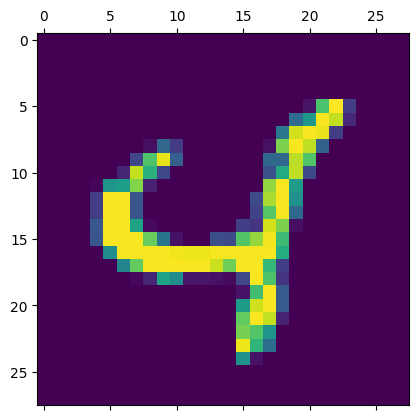

In [39]:
plt.matshow(x_test[67])

In [40]:
np.max(x_train)

np.uint8(255)

In [41]:
x_train = x_train/255
x_test = x_test/255

In [42]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)

In [43]:
x_train.shape

(60000, 784)

In [44]:
x_test.shape

(10000, 784)

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [47]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8107 - loss: 0.7175
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9138 - loss: 0.3090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9202 - loss: 0.2857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9237 - loss: 0.2754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 0.2622


In [48]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9128 - loss: 0.3052


[0.2673901617527008, 0.9251999855041504]

In [49]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
y_pred

array([[1.5549320e-02, 3.0552610e-07, 3.7111599e-02, ..., 9.9973649e-01,
        7.3437504e-02, 6.4935082e-01],
       [4.2284334e-01, 9.4687305e-03, 9.9909085e-01, ..., 6.1589259e-13,
        1.7088805e-01, 2.6834708e-09],
       [3.5782869e-04, 9.9270427e-01, 6.6964042e-01, ..., 1.2239892e-01,
        3.9861560e-01, 5.1922735e-02],
       ...,
       [2.1775031e-06, 3.2331609e-06, 1.1645100e-03, ..., 1.4335996e-01,
        4.5665878e-01, 7.8923589e-01],
       [8.3955842e-05, 1.9669846e-04, 1.9515726e-04, ..., 3.0681091e-05,
        6.0454261e-01, 1.4651203e-04],
       [6.6499589e-03, 5.4395782e-10, 1.9748417e-01, ..., 6.8928605e-09,
        1.3353945e-04, 1.0055840e-06]], dtype=float32)

In [51]:
y_pred = [int(np.argmax(pred)) for pred in y_pred]

In [52]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [53]:
y_pred[23]

5

In [54]:
int(y_test[23])

5

In [55]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [56]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  928,   18,    7,    3,   12,    8,   37,    5],
       [   2,    0,   16,  936,    1,   17,    2,    9,   18,    9],
       [   1,    1,    7,    2,  907,    0,   11,    4,   10,   39],
       [   9,    2,    2,   47,    9,  770,   13,    5,   29,    6],
       [  12,    3,    7,    1,    7,   15,  908,    2,    3,    0],
       [   1,    5,   24,   11,    6,    1,    0,  938,    3,   39],
       [   5,    7,    7,   34,    9,   24,    9,    8,  860,   11],
       [  11,    7,    1,   14,   22,    5,    0,   14,    4,  931]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

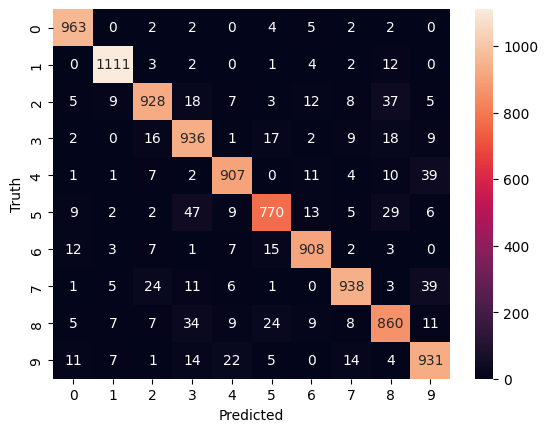

In [57]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape = (28*28,), activation = "relu"),
    tf.keras.layers.Dense(10, activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [60]:
model1.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8725 - loss: 0.4594
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9621 - loss: 0.1314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9792 - loss: 0.0663
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0488


In [61]:
model1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0936


[0.07905879616737366, 0.975600004196167]

In [62]:
y_pred1 = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [63]:
y_pred1 = [int(np.argmax(pred)) for pred in y_pred1]

In [64]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred1)

Text(50.722222222222214, 0.5, 'Truth')

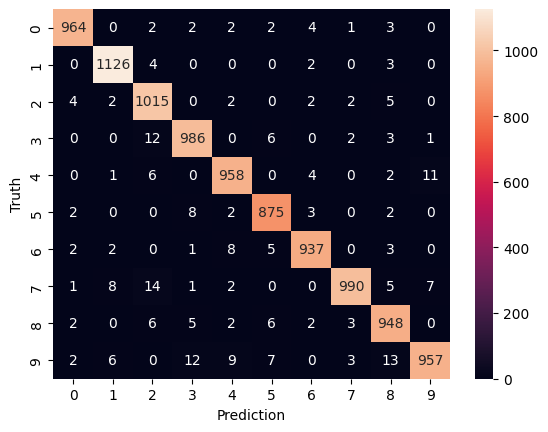

In [65]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [66]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8716 - loss: 0.4613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9600 - loss: 0.1371
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9800 - loss: 0.0666
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0525
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0411
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0273
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0222
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0178


In [67]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0924


[0.08189194649457932, 0.9783999919891357]

In [68]:
y_pred2 = model2.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [69]:
y_pred2 = [int(np.argmax(pred)) for pred in y_pred2]

In [70]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred2)

Text(50.722222222222214, 0.5, 'Truth')

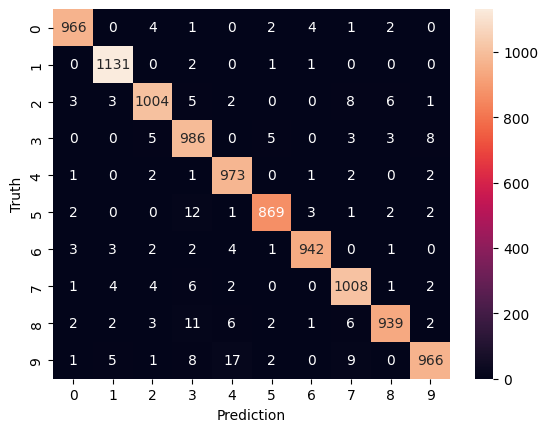

In [71]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Prediction")
plt.ylabel("Truth")